# Week 8 Problem 3

If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/UI-DataScience/info490-fa16/blob/master/Week2/assignments/README.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

In [1]:
%matplotlib inline

# plotting tools
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# testing tools
from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal
from pandas.util.testing import assert_frame_equal

In [2]:
!head '/home/data_scientist/data/2001.csv'

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2001,1,17,3,1806,1810,1931,1934,US,375,N700��,85,84,60,-3,-4,BWI,CLT,361,5,20,0,NA,0,NA,NA,NA,NA,NA
2001,1,18,4,1805,1810,1938,1934,US,375,N713��,93,84,64,4,-5,BWI,CLT,361,9,20,0,NA,0,NA,NA,NA,NA,NA
2001,1,19,5,1821,1810,1957,1934,US,375,N702��,96,84,80,23,11,BWI,CLT,361,6,10,0,NA,0,NA,NA,NA,NA,NA
2001,1,20,6,1807,1810,1944,1934,US,375,N701��,97,84,66,10,-3,BWI,CLT,361,4,27,0,NA,0,NA,NA,NA,NA,NA
2001,1,21,7,1810,1810,1954,1934,US,375,N768��,104,84,62,20,0,BWI,CLT,361,4,38,0,NA,0,NA,NA,NA,NA,NA
2001,1,22,1,1807,1810,1931,1934,US,375,N722��,84,84,61,-3,-3,BWI,CLT,361,12,11,0,NA,0,NA,NA,NA,NA,NA
2001,1,23,2,1802,1810,1924,1934,US,375,N732��,82,84,61,-10,-8,BWI,CLT,361,5,16,0,NA,0,NA,NA,NA,NA,NA

# Problem 1. Flight Cancellations by Month

In this problem, you will use Pandas
  [`groupby()`](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
  and [`aggregate()`](http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation)
  functions to compute and plot the number of flight cancellations
  in each month of 2001. The file we are going to work with for this question is: `/home/data_scientist/data/2001.csv` (The full original file, not the cutted version we used for Week 7). You could try `!head /home/data_scientist/data/2001.csv` if you do not remember what its content looks like.
  
## 1. Function: `get_month_cancelled()`

Write a function named `get_month_cancelled()` that takes a filepath (str), 
  and returns a `pd.DataFrame` that is indexed by the **names** of the months
  and has only one column `Cancelled`, the number of flight cancellations in each month.

- The filepath we are going to pass in the assertion test code is `/home/data_scientist/data/2001.csv`.
- Don't forget to set the `encoding` option.
- Remember, `2001.csv` is a very large file. If you try to read in all 29 columns, your code will be very slow.
  Use the [`usecols`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) parameter to read only two columns, `Month` and `Cancelled`.
- Instead of using integers as index (default), use the following list to set the indices:
  ```python
  ['January', 'February', 'March', 'April', 'May', 'June',
   'July', 'August', 'September', 'October', 'November', 'December']
  ```

In [3]:
def get_month_cancelled(filepath):
    '''
    Reads the "Month" and "Cancelled" columns of a CSV file
    and returns a Pandas DataFrame with only one column "Cancelled"
    indexed by the months.
    
    Parameters
    ----------
    filename(str): The filename of the CSV file.
    
    Returns
    -------
    pd.DataFrame: "Cancelled" column, indexed by names of the months.
    '''
    # YOUR CODE HERE
    # Input the file
    df = pd.read_csv(filepath, encoding='latin1', usecols=['Month', 'Cancelled'])
    # Group the data
    count = df.groupby('Month').aggregate(sum)
    # Change the index
    count.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return count

When you run the code cell below, you should get:

               Cancelled
    January        19891
    February       17448
    March          17876
    April          11414
    May             9452
    June           15509
    July           11286
    August         13318
    September      99324
    October         6850
    November        4497
    December        4333

In [4]:
csv_path = '/home/data_scientist/data/2001.csv'
month_cancelled = get_month_cancelled(csv_path)
print(month_cancelled)

           Cancelled
January        19891
February       17448
March          17876
April          11414
May             9452
June           15509
July           11286
August         13318
September      99324
October         6850
November        4497
December        4333


In [5]:
# assertions
p1_answer = pd.DataFrame(
    [19891, 17448, 17876, 11414,
     9452, 15509, 11286, 13318,
     99324, 6850, 4497, 4333],
    index=['January', 'February', 'March', 'April',
           'May', 'June', 'July', 'August',
           'September', 'October', 'November', 'December'],
    columns=['Cancelled']
    )

assert_frame_equal(month_cancelled, p1_answer)

## 2. Function: `plot_month_cancelled()`

Write a function named `plot_month_cancelled()` that takes a `pd.DataFrame` to make a bar chart using Pandas [`plot()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) function, and returns a matplotlib.Axes object. 
- The code for creating a `Figure` object and an `Axes` object is already provided:
```python
fig, ax = plt.subplots()
```
- In Pandas `plot()` function, include the parameter **`ax=ax`**, so that your plot is assigned to the `Axes` object we have constructed.
- Your plot should have a title and axis labels.
- Make your plot pretty.

In [6]:
def plot_month_cancelled(df):
    """
    Creates a two-dimensional scatter plot.
    
    Parameters
    ----------
    df: A pd.DataFrame object with one column "Cancelled".
    
    Returns
    -------
    A matplotlib.Axes object.
    """
    fig, ax = plt.subplots()
    
    # YOUR CODE HERE
    # Create the plot
    df.plot(kind='bar', ax=ax)
    # Set the label
    ax.set_xlabel('Month')
    ax.set_ylabel('Cancelled Number')
    # Set the title
    ax.set_title('Month cancelled')
    return ax

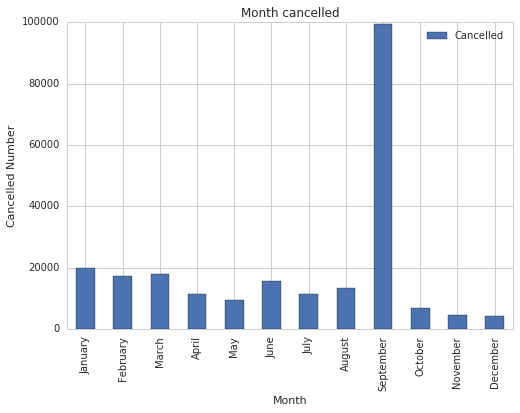

In [7]:
ax = plot_month_cancelled(month_cancelled)

In [8]:
# assertions
# check title, axis labels
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

# check data
assert_equal(
    len(ax.patches), 12,
    msg="Your plot does not have enough data patches."
)

xdata = [a.get_text() for a in ax.get_xticklabels()]
ydata = [p.get_height() for p in ax.patches]

assert_array_equal(xdata, month_cancelled.index)
assert_array_equal(ydata, month_cancelled['Cancelled'])

# check if your function can handle other dataframes
test_index = [str(i) for i in np.random.randint(20, size=20)]
test_data = np.random.randint(20, size=20)
test_df = pd.DataFrame(test_data, index=test_index, columns=['test'])

ax1 = plot_month_cancelled(test_df)

x1data = [a.get_text() for a in ax1.get_xticklabels()]
y1data = [p.get_height() for p in ax1.patches]

assert_array_equal(x1data, test_index)
assert_array_equal(y1data, test_data)

plt.close()

# Problem 2. Find Best Movies by Genres

In this problem, you will use multiple Pandas dataframe operations to find movies of certain genres with high average ratings. The files we are going to use is `/home/data_scientist/data/ml-latest-small/movies.csv` and `/home/data_scientist/data/ml-latest-small/ratings.csv`. The code cell below converts the two csv files into two `pd.DataFrame` objects named `mv` (from `movies.csv`) and `rt` (from `ratings.csv`) and filters out the movies with less than 50 rating records to make sure the average ratings are meaningful.

In [9]:
# filepaths
movies = '/home/data_scientist/data/ml-latest-small/movies.csv'
ratings = '/home/data_scientist/data/ml-latest-small/ratings.csv'

# construct dataframes
mv = pd.read_csv(movies)
rt = pd.read_csv(ratings)

# filter out movies with less than 50 rating records
counts = rt['movieId'].value_counts()
rt = rt[rt['movieId'].isin(counts[counts>50].index)]

print(mv[:5])
print('\n--------------------------------------------------\n')
print(rt[:5])

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

--------------------------------------------------

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523
5       1      110     4.0  1217896150


## 1. Function: `find_best_movies_by_genres()`

Write a function named `find_best_movies_by_genres()` that takes two `pd.DataFrame` objects and a genres type (str), and returns a `pd.DataFrame` object that is indexed by `movieId` and has three columns, `rating`, `title`, `genres` (in this specified order).
- First, apply Pandas [`groupby()`](http://pandas.pydata.org/pandas-docs/stable/groupby.html) function to get the **mean** value of `rating` for each `movieId` in `rt`. At this step, you can keep the two columns `rating` and `movieId` only. We are not going to use the rest of columns in `rt` for this question. Make sure you set `as_index` to be `False`, because we will use the column `movieId` in the next step.
- Next, apply Pandas [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html) to merge the averaged `rt` (i.e. the result from step 1) with `mv` based on the common column `movieId`. You should use the averaged `rt` to be `left`, and `mv` to be `right` in the `merge()` function, because we would like `rating` to come before movie information, as indicated by the problem. The merged dataframe has the following columns: `movieId`, `rating`, `title`, and `genres`. Note that `rating` now contains the averaged rating score. 
- After merging, select rows from the merged dataframe if both the following conditions are satisfied:
    - The (averaged) `rating` is above or equal to 4.0;
    - The `genres` column contains the input string `genres_type`. For example, if the intput string is `"Horror"`, you should filter in rows whose `genres` are `Horror`, `Crime|Horror`, etc. *Hint*: you could apply the [`str.contains()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) function.
- After selection, apply Pandas [`sort_values()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) by the `rating` column with a descending order by setting `ascending` to be `False`.
- Finally, set `movieId` to be index in the sorted dataframe, and return the resulting dataframe.
- Instead of overwriting dataframes, you could create different dataframe variables for each step. For example, you could name the result of the first step to be `rt_mean`, etc.
- Alternatively, you could use [`join()`](http://pandas.pydata.org/pandas-docs/stable/merging.html) instead of `merge()`. Before you use `join()`, `as_index` in `groupby()` should be `True` (default), and you should set `movieId` to be the index of `mv`. You can skip the last step (set the index). 

In [10]:
def find_best_movies_by_genres(mv, rt, genres_type):
    '''
    Constructs a new pd.DataFrame from mv and rt using groupby(), merge(), 
    
    Parameters
    ----------
    mv(pd.DataFrame): movie information.
    rt(pd.DataFrame): rating information.
    genres_type(str): The filename of the CSV file.
    
    Returns
    -------
    pd.DataFrame: 3 columns (rating, title, genres), indexed by movieId.
    '''
    # YOUR CODE HERE
    # Group movieId by the mean of rating
    avert = rt[['rating', 'movieId']].groupby('movieId', as_index=False).mean()
    # Merge avert and mv
    mrg = pd.merge(avert, mv, on='movieId')
    # Select rows that rating is above or equal to 4.0 and genres column contains the input string genres_type
    selected_mrg = mrg[(mrg['rating']>=4.0) & (mrg['genres'].str.contains(genres_type))]
    # Sort by rating column with a descending order
    sorted_mrg = selected_mrg.sort_values(by='rating', ascending=False)
    # Set index to be movieId
    result = sorted_mrg.set_index('movieId')
    return result
    

When you run the code cell below, you should get: 

```
           rating                             title  \
movieId                                               
593      4.194828  Silence of the Lambs, The (1991)   
1219     4.186047                     Psycho (1960)   
1200     4.146497                     Aliens (1986)   
2762     4.130890           Sixth Sense, The (1999)   
1214     4.064103                      Alien (1979)   
8874     4.050000          Shaun of the Dead (2004)   
1258     4.004464               Shining, The (1980)   

                                 genres  
movieId                                  
593               Crime|Horror|Thriller  
1219                       Crime|Horror  
1200     Action|Adventure|Horror|Sci-Fi  
2762               Drama|Horror|Mystery  
1214                      Horror|Sci-Fi  
8874                      Comedy|Horror  
1258                             Horror  ```

In [11]:
horror = find_best_movies_by_genres(mv, rt, 'Horror')
print(horror)

           rating                             title  \
movieId                                               
593      4.194828  Silence of the Lambs, The (1991)   
1219     4.186047                     Psycho (1960)   
1200     4.146497                     Aliens (1986)   
2762     4.130890           Sixth Sense, The (1999)   
1214     4.064103                      Alien (1979)   
8874     4.050000          Shaun of the Dead (2004)   
1258     4.004464               Shining, The (1980)   

                                 genres  
movieId                                  
593               Crime|Horror|Thriller  
1219                       Crime|Horror  
1200     Action|Adventure|Horror|Sci-Fi  
2762               Drama|Horror|Mystery  
1214                      Horror|Sci-Fi  
8874                      Comedy|Horror  
1258                             Horror  


In [12]:
# assertions 
p2_answer_horror = pd.DataFrame(
    [
        [4.194827586206896, 'Silence of the Lambs, The (1991)','Crime|Horror|Thriller'],
        [4.186046511627907, 'Psycho (1960)', 'Crime|Horror'],
        [4.146496815286624, 'Aliens (1986)', 'Action|Adventure|Horror|Sci-Fi'],
        [4.130890052356021, 'Sixth Sense, The (1999)','Drama|Horror|Mystery'],
        [4.064102564102564, 'Alien (1979)', 'Horror|Sci-Fi'],
        [4.05, 'Shaun of the Dead (2004)', 'Comedy|Horror'],
        [4.004464285714286, 'Shining, The (1980)', 'Horror']
    ],
    index=[593, 1219, 1200, 2762, 1214, 8874, 1258],
    columns=['rating', 'title', 'genres']
    )
p2_answer_horror.index.name = 'movieId'
assert_frame_equal(horror, p2_answer_horror)

animation = find_best_movies_by_genres(mv, rt, 'Animation')
p2_answer_animation = pd.DataFrame(
    [
        [4.384615384615385, 'Princess Mononoke (Mononoke-hime) (1997)', 'Action|Adventure|Animation|Drama|Fantasy'],
        [4.236111111111111, 'Spirited Away (Sen to Chihiro no kamikakushi) (2001)', 'Adventure|Animation|Fantasy'],
        [4.1688311688311686, 'Wallace & Gromit: The Wrong Trousers (1993)', 'Animation|Children|Comedy|Crime'],
        [4.163636363636364, 'Wallace & Gromit: A Close Shave (1995)', 'Animation|Children|Comedy'],
        [4.153225806451613, 'Up (2009)', 'Adventure|Animation|Children|Drama'],
        [4.0, 'Iron Giant, The (1999)', 'Adventure|Animation|Children|Drama|Sci-Fi']
    ],
    index=[3000, 5618, 1148, 745, 68954, 2761],
    columns=['rating', 'title', 'genres']
    )
p2_answer_animation.index.name = 'movieId'
assert_frame_equal(animation, p2_answer_animation)